In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime


In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [16]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [20]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

570

In [6]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.

record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | longyearbyen
Processing Record 2 of Set 1 | klaksvik
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | sechura
Processing Record 5 of Set 1 | maniitsoq
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | walvis bay
Processing Record 8 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | talnakh
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | hvolsvollur
Processing Record 16 of Set 1 | piacabucu
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | ozgon
City not found. Skipping...
Processing Record 19 of Set 1 | nanga eboko
Processing Record 20 of Se

Processing Record 35 of Set 4 | aban
Processing Record 36 of Set 4 | siniscola
Processing Record 37 of Set 4 | gushikawa
Processing Record 38 of Set 4 | broken hill
Processing Record 39 of Set 4 | salalah
Processing Record 40 of Set 4 | pasighat
Processing Record 41 of Set 4 | solnechnyy
Processing Record 42 of Set 4 | ust-charyshskaya pristan
Processing Record 43 of Set 4 | tiksi
Processing Record 44 of Set 4 | mount gambier
Processing Record 45 of Set 4 | honiara
Processing Record 46 of Set 4 | maldonado
Processing Record 47 of Set 4 | nixa
Processing Record 48 of Set 4 | pringsewu
Processing Record 49 of Set 4 | chokurdakh
Processing Record 50 of Set 4 | saint anthony
Processing Record 1 of Set 5 | port hardy
Processing Record 2 of Set 5 | kapaa
Processing Record 3 of Set 5 | nantucket
Processing Record 4 of Set 5 | mayumba
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | ponta do sol
Processing Record 7 of Set 5 | port augusta
Processing Record 8 of Set 5 | jun

Processing Record 27 of Set 8 | sakakah
Processing Record 28 of Set 8 | meulaboh
Processing Record 29 of Set 8 | turayf
Processing Record 30 of Set 8 | qaqortoq
Processing Record 31 of Set 8 | mount isa
Processing Record 32 of Set 8 | kutna hora
Processing Record 33 of Set 8 | honningsvag
Processing Record 34 of Set 8 | maarianhamina
Processing Record 35 of Set 8 | hayato
City not found. Skipping...
Processing Record 36 of Set 8 | la macarena
Processing Record 37 of Set 8 | atchison
Processing Record 38 of Set 8 | henzada
City not found. Skipping...
Processing Record 39 of Set 8 | severo-kurilsk
Processing Record 40 of Set 8 | ginda
Processing Record 41 of Set 8 | waingapu
Processing Record 42 of Set 8 | oktyabrskiy
Processing Record 43 of Set 8 | west wendover
Processing Record 44 of Set 8 | barkly west
Processing Record 45 of Set 8 | san javier
Processing Record 46 of Set 8 | zeya
Processing Record 47 of Set 8 | santona
Processing Record 48 of Set 8 | jalu
Processing Record 49 of Set

Processing Record 15 of Set 12 | ozuluama
Processing Record 16 of Set 12 | siirt
Processing Record 17 of Set 12 | jardim
Processing Record 18 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 19 of Set 12 | nakamura
Processing Record 20 of Set 12 | oranjemund
Processing Record 21 of Set 12 | puerto montt
Processing Record 22 of Set 12 | zhangye
Processing Record 23 of Set 12 | lorengau
Processing Record 24 of Set 12 | morant bay
Processing Record 25 of Set 12 | kawalu
Processing Record 26 of Set 12 | leeton
Processing Record 27 of Set 12 | kiunga
Processing Record 28 of Set 12 | skjervoy
Processing Record 29 of Set 12 | old saybrook
Processing Record 30 of Set 12 | peabiru
Processing Record 31 of Set 12 | torit
Processing Record 32 of Set 12 | parabel
Processing Record 33 of Set 12 | hirara
Processing Record 34 of Set 12 | tarabuco
Processing Record 35 of Set 12 | azimur
City not found. Skipping...
Processing Record 36 of Set 12 | deputatskiy
Processing Recor

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Longyearbyen,78.2186,15.6401,44.44,65,75,10.36,SJ,2022-07-06 05:34:21
1,Klaksvik,62.2266,-6.5890,50.92,99,100,15.77,FO,2022-07-06 05:34:22
2,Port Elizabeth,-33.9180,25.5701,57.49,91,0,9.22,ZA,2022-07-06 05:33:59
3,Sechura,-5.5569,-80.8222,62.73,80,11,11.48,PE,2022-07-06 05:34:23
4,Maniitsoq,65.4167,-52.9000,40.51,93,64,3.04,GL,2022-07-06 05:34:23
5,Atuona,-9.8000,-139.0333,77.58,68,43,25.72,PF,2022-07-06 05:33:05
6,Walvis Bay,-22.9575,14.5053,51.10,87,0,8.05,NA,2022-07-06 05:34:23
7,Albany,42.6001,-73.9662,70.59,94,87,4.21,US,2022-07-06 05:33:10
8,Talnakh,69.4865,88.3972,58.21,70,100,7.31,RU,2022-07-06 05:34:24
9,Jamestown,42.0970,-79.2353,69.94,87,20,8.05,US,2022-07-06 05:34:25


In [8]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Longyearbyen,SJ,2022-07-06 05:34:21,78.2186,15.6401,44.44,65,75,10.36
1,Klaksvik,FO,2022-07-06 05:34:22,62.2266,-6.5890,50.92,99,100,15.77
2,Port Elizabeth,ZA,2022-07-06 05:33:59,-33.9180,25.5701,57.49,91,0,9.22
3,Sechura,PE,2022-07-06 05:34:23,-5.5569,-80.8222,62.73,80,11,11.48
4,Maniitsoq,GL,2022-07-06 05:34:23,65.4167,-52.9000,40.51,93,64,3.04


In [23]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

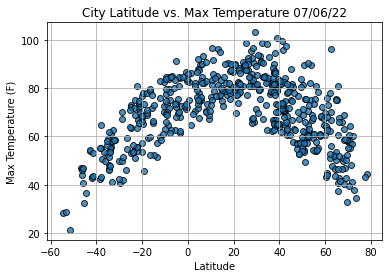

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

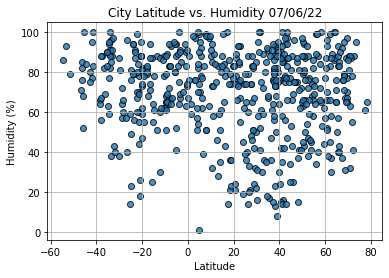

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

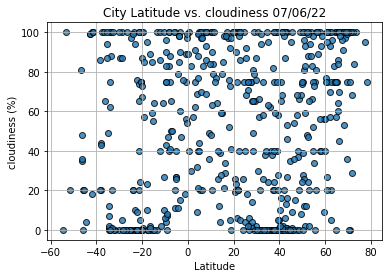

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. cloudiness "+ time.strftime("%x"))
plt.ylabel("cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

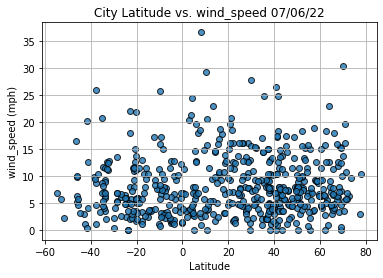

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. wind_speed "+ time.strftime("%x"))
plt.ylabel("wind_speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()